# Initialization

OpenCV can have an involved installation process, right now I'm using https://pypi.org/project/opencv-python/, which allows you to just install it using pip. This method is unofficial, but as far as I can tell also the most common way of doing it.
The OpenCV website has it's own process that I haven't tried. The actual functionality between the two _shouldn't_ be any different.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv
from skimage.feature import local_binary_pattern
from skimage.color import label2rgb

img = cv.imread('sample.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
resized = cv.resize(img, (200, 200))

# Image Vector

OpenCV's imread function gives a simple image vector in numpy array format

In [2]:
img.shape, img , resized.shape, resized

((2760, 6000, 3),
 array([[[245, 225, 190],
         [246, 226, 191],
         [246, 223, 191],
         ...,
         [241, 214, 177],
         [241, 214, 177],
         [241, 214, 177]],
 
        [[245, 225, 190],
         [242, 222, 187],
         [247, 225, 190],
         ...,
         [237, 210, 173],
         [237, 210, 173],
         [241, 214, 177]],
 
        [[245, 225, 190],
         [240, 220, 185],
         [245, 225, 190],
         ...,
         [240, 213, 176],
         [239, 212, 175],
         [241, 214, 177]],
 
        ...,
 
        [[ 13,   0,   2],
         [ 16,   3,   5],
         [ 14,   1,   3],
         ...,
         [ 11,   0,   2],
         [ 13,   0,   2],
         [ 13,   0,   2]],
 
        [[ 13,   0,   2],
         [ 16,   3,   5],
         [ 13,   0,   2],
         ...,
         [ 11,   0,   2],
         [ 11,   0,   2],
         [ 13,   0,   2]],
 
        [[ 14,   1,   3],
         [ 16,   3,   5],
         [ 13,   0,   2],
         ...,
         [

In [3]:
#Color Histogram

In [4]:
b = cv.calcHist([img], [0], None, [256], (0, 256), accumulate=False) #image, channel, mask
g = cv.calcHist([img], [1], None, [256], (0, 256), accumulate=False)
r = cv.calcHist([img], [2], None, [256], (0, 256), accumulate=False)

r.shape, r, g.shape, g, b.shape, b

((256, 1),
 array([[4.24860e+05],
        [2.12428e+05],
        [2.42165e+05],
        [1.83908e+05],
        [1.19941e+05],
        [1.10696e+05],
        [1.67409e+05],
        [1.87172e+05],
        [1.72763e+05],
        [1.38403e+05],
        [1.13271e+05],
        [1.36992e+05],
        [1.43171e+05],
        [1.49385e+05],
        [1.40795e+05],
        [1.14471e+05],
        [1.12978e+05],
        [1.08530e+05],
        [1.11800e+05],
        [1.11251e+05],
        [1.01514e+05],
        [9.40600e+04],
        [9.42220e+04],
        [8.86680e+04],
        [9.69510e+04],
        [8.85600e+04],
        [8.21440e+04],
        [8.67720e+04],
        [8.22460e+04],
        [8.16510e+04],
        [7.08050e+04],
        [6.44480e+04],
        [7.10280e+04],
        [7.03490e+04],
        [5.88190e+04],
        [5.16100e+04],
        [5.07000e+04],
        [5.76950e+04],
        [5.68050e+04],
        [4.51180e+04],
        [3.82260e+04],
        [4.18230e+04],
        [4.62300e+04],


I can't get matplotlib's hist frunciton to work properly, so have some sad line plots instead:

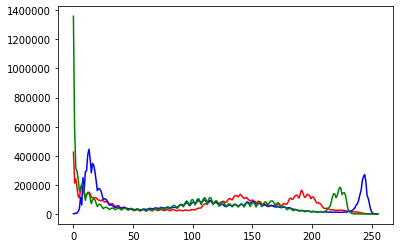

In [5]:
plt.plot(r, color='r')
plt.plot(b, color='b')
plt.plot(g, color='g')

# Histogram of Oriented Gradients

In [6]:
hog = cv.HOGDescriptor()
hist = hog.compute(resized)
hist.shape , hist

((680400, 1),
 array([[0.07673967],
        [0.07471775],
        [0.15694499],
        ...,
        [0.20883785],
        [0.15347148],
        [0.1560562 ]], dtype=float32))

# Hu Moments

In [7]:
moments = cv.moments(gray)
hu = cv.HuMoments(moments)
hu.shape, hu

((7, 1),
 array([[1.94836959e-03],
        [2.45745273e-06],
        [2.95312107e-11],
        [1.96497164e-11],
        [1.15494281e-22],
        [2.81054695e-14],
        [4.59035658e-22]]))

#Sift Keypoints

Be careful with this bit. OpenCV saves

In [15]:
n = 20 #number of keypoints to generate, ranked by the highest local contrast score

sift = cv.SIFT_create(n)

color_keys = sift.detect(img, None)
gray_keys = sift.detect(gray, None)

color_desc = sift.compute(img, color_keys)
gray_desc = sift.compute(gray, gray_keys)

plot = cv.drawKeypoints(img, gray_keys, img)

cv.imshow('Keypoints', plot)# I have issues with this line if the sample image is too large

# Local Binary Patterns

In [10]:
radius = 3
n_points = 8*radius

lbp = local_binary_pattern(gray, n_points, radius, 'uniform')

lbp.shape, lbp

((2760, 6000),
 array([[ 0.,  1., 25., ..., 25.,  2.,  1.],
        [ 4., 25.,  4., ..., 10.,  9., 25.],
        [ 4., 10., 25., ..., 11., 25.,  7.],
        ...,
        [ 9.,  0.,  0., ...,  1.,  1.,  0.],
        [ 8.,  0., 10., ...,  0., 25.,  0.],
        [ 1.,  0.,  9., ..., 10.,  9., 25.]]))

A plotting example for the above ripped from skimage's site

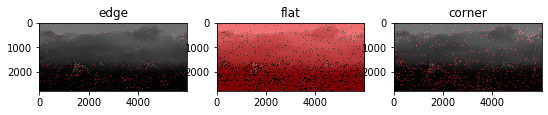

In [11]:
def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)
        
fig, ax_img = plt.subplots(nrows=1, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) + list(range(i_34 - w, i_34 + w + 1)))
label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels, title in zip(ax_img, label_sets, titles):
    ax.imshow(overlay_labels(img, lbp, labels))
    ax.set_title(title)
    
plt.show()